___________________________
Practice and notes from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content) <br>
Comments are just out of my understanding, mostly
# Futures #

### Futures symbols; get_pricing; future.to_dict();
### consecutive history; continuous future history and adjustment options;
#### <i> (There is an unsolved problem: I could not make it work for DataFrame.pivot(index=.., column=.., values=...) with "KeyErrorTraceback dtype='datetime64[ns, UTC]',...... not in index" !!!!!!. Only can make it work without "values=..." option, for DataFrame with only two columes.) </i>

Has to be run in quantopian website

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantopian.research.experimental import history
from quantopian.research.experimental import continuous_future

# Getting futures #
A reference to a futures contract is obtained via the symbols function. Futures contracts are denoted by a base symbol + a code for month/year of delivery. CLF16 is a contract for crude oil (CL) with delivery in January (F) 2016 (16).<br>
### List of futures in quantopian  <br>
Symbol | Future |
--- | --- | 
BD | Big Dow
BO | Soybean Oil
CM | Corn E-Mini
CN | Corn
DJ | DJIA Futures
ET | Ethanol
FF | 30-Day Federal Funds
FI | 5-Year Deliverable Interest Rate Swap Futures
FS | 5-Year Interest Rate Swap Futures
FV | 5-Year T-Note
MB | Municipal Bonds
MS | Soybeans E-Mini
MW | Wheat E-Mini
OA | Oats
RR | Rough Rice
SM | Soybean Meal
SY | Soybeans
TN | 10-Year Deliverable Interest Rate Swap Futures
TS | 10-Year Interest Rate Swap Futures
TU | 2-Year T-Note
TY | 10-Year T-Note
UB | Ultra Tbond
US | 30-Year T-Bond
WC | Wheat
YM | Dow Jones E-mini
VX | VIX Futures
AD | Australian Dollar
AI | Bloomberg Commodity Index Futures
BP | British Pound
CD | Canadian Dollar
EC | Euro FX
ED | Eurodollar
EE | Euro FX E-mini
ES | S&P 500 E-Mini
EU | E-micro EUR/USD Futures
FC | Feeder Cattle
JE | Japanese Yen E-mini
JY | Japanese Yen
LB | Lumber
LC | Live Cattle
LH | Lean Hogs
MD | S&P 400 MidCap Futures
ME | Mexican Peso
MI | S&P 400 MidCap E-Mini
ND | NASDAQ 100 Futures
NK | Nikkei 225 Futures
NQ | NASDAQ 100 E-Mini
NZ | New Zealand Dollar
SF | Swiss Franc
SP | S&P 500 Futures
TB | TBills
GC | Gold
HG | Copper High Grade
SV | Silver
CL | Light Sweet Crude Oil
HO | NY Harbor ULSD Futures
HU | Unleaded Gasoline
NG | Natural Gas
PA | Palladium
PL | Platinum
PB | Pork Bellies
QG | Natural Gas E-mini
QM | Crude Oil E-Mini
XB | RBOB Gasoline Futures
EI | MSCI Emerging Markets Mini
EL | Eurodollar NYSE LIFFE
MG | MSCI EAFE Mini
XG | Gold mini-sized
YS | Silver mini-sized
RM | Russell 1000 Mini
SB | Sugar #11
ER | Russell 2000 Mini

### List of futures Date/Time codes
Month | Code |
--- | --- | 
January | F
February | G
March | H
April | J
May | K
June | M
July | N
August | Q
September | U
October | V
November | X
December | Z

In [2]:
future_gas = symbols('NGF19')
future_gas.asset_name

u'Natural Gas'

In [3]:
print(future_gas)

Future(1061201901 [NGF19])


In [4]:
print(future_gas.to_dict())

{'root_symbol': u'NG', 'tick_size': 0.001, 'end_date': Timestamp('2018-09-20 00:00:00+0000', tz='UTC'), 'exchange': u'NYMEX', 'auto_close_date': Timestamp('2018-12-24 00:00:00+0000', tz='UTC'), 'expiration_date': Timestamp('2018-12-27 00:00:00+0000', tz='UTC'), 'symbol': u'NGF19', 'multiplier': 10000.0, 'notice_date': Timestamp('2018-12-28 00:00:00+0000', tz='UTC'), 'first_traded': None, 'asset_name': u'Natural Gas', 'exchange_full': u'NYMEX', 'sid': 1061201901, 'start_date': Timestamp('2010-12-23 00:00:00+0000', tz='UTC'), 'exchange_info': ExchangeInfo(u'NYMEX', u'NYMEX', u'US')}


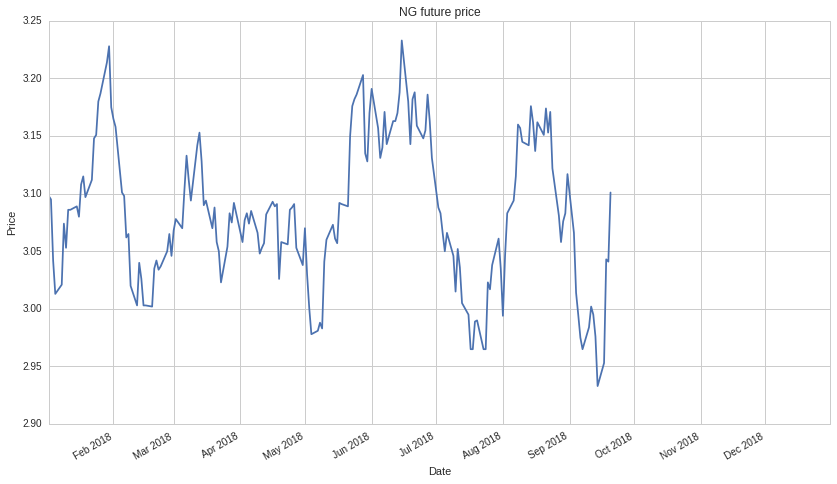

In [5]:
future_position_value = get_pricing(future_gas, start_date='2018-01-01', end_date='2019-01-01')
future_position_value['price'].plot()
plt.title('NG future price')
plt.xlabel('Date')
plt.ylabel('Price');

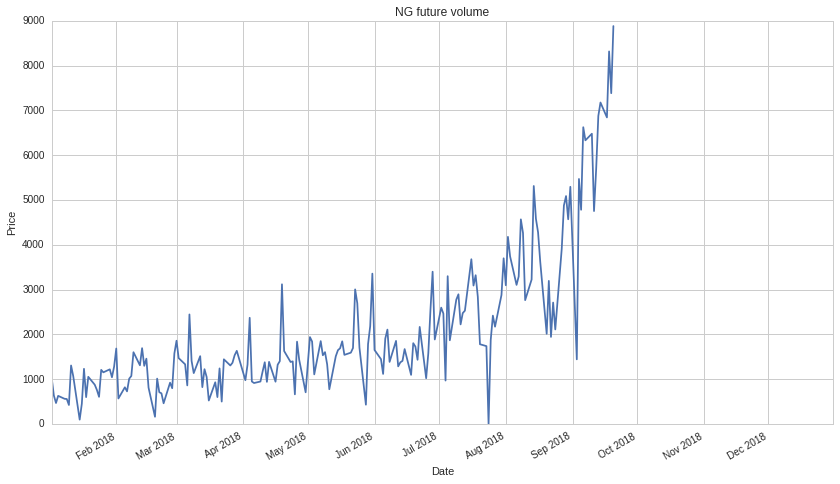

In [6]:
future_position_value['volume'].plot()
plt.title('NG future volume')
plt.xlabel('Date')
plt.ylabel('Price');

# Historical Data #

In [7]:
from quantopian.research.experimental import history
history.__doc__

"\n    Load a table of historical trade data.\n\n    Parameters\n    ----------\n    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.\n        Valid input types are Asset, Integral, basestring, or ContinuousFuture.\n        In the case that the passed objects are strings, they are interpreted\n        as ticker symbols and resolved relative to the date specified by\n        symbol_reference_date.\n\n    fields : str or list\n        String or list drawn from {'price', 'open_price', 'high', 'low',\n        'close_price', 'volume', 'contract'}.\n\n    start : str or pd.Timestamp\n        String or Timestamp representing a start date or start intraday minute\n        for the returned data.\n\n    end : str or pd.Timestamp\n        String or Timestamp representing an end date or end intraday minute for\n        the returned data.\n\n    frequency : {'daily', 'minute'}\n        Resolution of the data to be returned.\n\n    symbol_reference_date : str or pd.Timestam

In [8]:
print(history.__doc__)   # the output without "print" is hard to read


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}.

    start : str or pd.Timestamp
        String or Timestamp representing a start date or start intraday minute
        for the returned data.

    end : str or pd.Timestamp
        String or Timestamp representing an end date or end intraday minute for
        the returned data.

    frequency : {'daily', 'minute'}
        Resolution of the data to be returned.

    symbol_reference_date : str or pd.Timestamp, optional
        String 

In [9]:
ng19_history = history(symbols('NGF19'), 
                       fields=['price', 'open_price', 'high', 'low', 'close_price', 'volume', 'contract'], 
                     frequency='daily', 
                       start ='2018-6-1', end ='2018-08-01')
ng19_history.head()

,price,open_price,high,low,close_price,volume,contract
2018-06-01 00:00:00+00:00,3.191,3.166,3.194,3.155,3.191,1654.0,Future(1061201901 [NGF19])
2018-06-04 00:00:00+00:00,3.157,3.171,3.191,3.155,3.157,1450.0,Future(1061201901 [NGF19])
2018-06-05 00:00:00+00:00,3.131,3.153,3.160,3.115,3.131,1119.0,Future(1061201901 [NGF19])
2018-06-06 00:00:00+00:00,3.140,3.137,3.151,3.118,3.140,1907.0,Future(1061201901 [NGF19])
2018-06-07 00:00:00+00:00,3.171,3.138,3.196,3.137,3.171,2109.0,Future(1061201901 [NGF19])


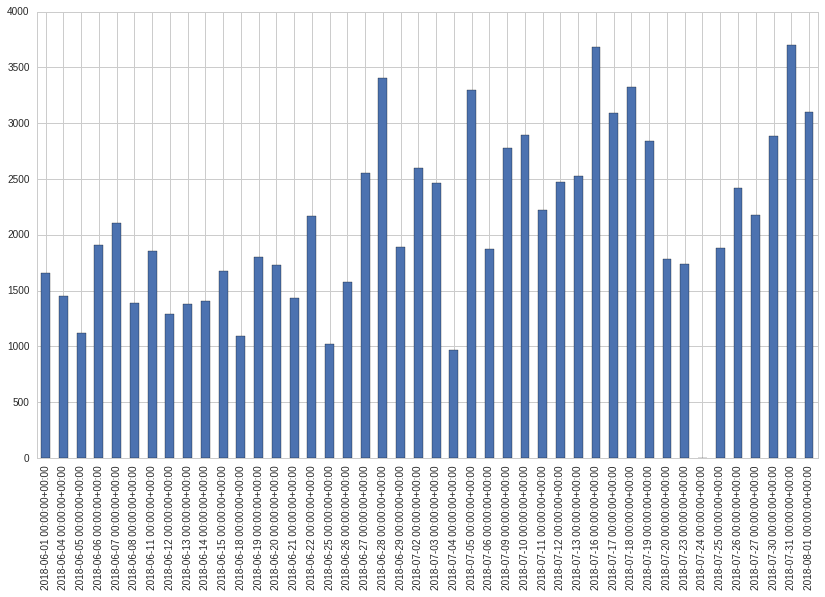

In [10]:
ng19_history['volume'].plot(kind='bar')

# Comparison of Different Maturity Dates

In [11]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 'NGJ17', 'NGK17', 'NGM17'])
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start ='2016-01-01', 
                                         end ='2017-08-01')

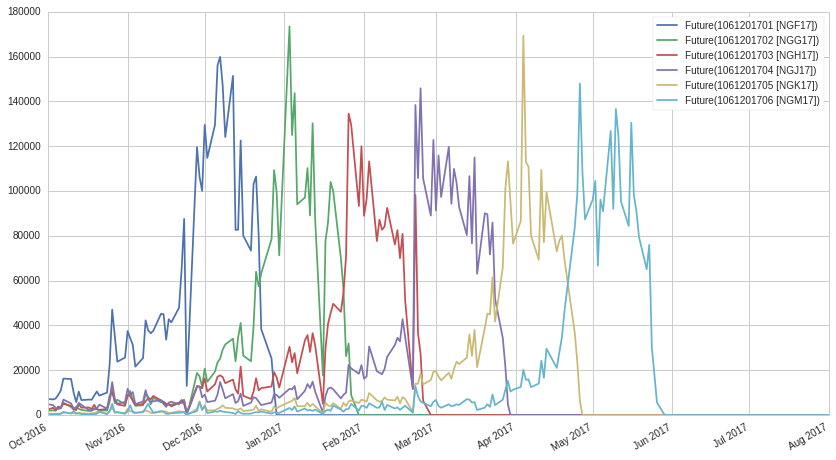

In [12]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01','2017-08-01']);

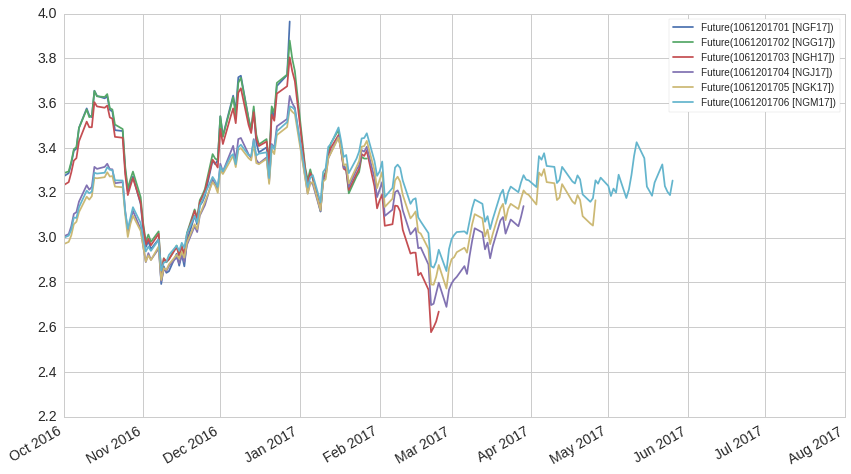

In [13]:
ng_consecutive_contract_price = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily', 
                                         start ='2016-01-01', 
                                         end ='2017-08-01')
ng_consecutive_contract_price.plot(xlim=['2016-10-01','2017-08-01'], fontsize=14);

In [14]:
ng_consecutive_contract_price.head(12)

,Future(1061201701 [NGF17]),Future(1061201702 [NGG17]),Future(1061201703 [NGH17]),Future(1061201704 [NGJ17]),Future(1061201705 [NGK17]),Future(1061201706 [NGM17])
2016-01-04 00:00:00+00:00,2.844,2.847,2.805,2.630,2.677,2.725
2016-01-05 00:00:00+00:00,2.881,2.867,2.846,2.648,2.677,2.680
2016-01-06 00:00:00+00:00,2.904,2.906,2.871,2.666,2.677,2.713
2016-01-07 00:00:00+00:00,2.936,2.931,2.896,2.708,2.716,2.743
2016-01-08 00:00:00+00:00,2.978,2.973,2.949,2.731,2.719,2.756
2016-01-11 00:00:00+00:00,2.923,2.931,2.878,2.674,2.677,2.740
2016-01-12 00:00:00+00:00,2.865,2.853,2.810,2.623,2.631,2.678
2016-01-13 00:00:00+00:00,2.875,2.864,2.822,2.627,2.623,2.663
2016-01-14 00:00:00+00:00,2.810,2.810,2.760,2.574,2.606,2.625
2016-01-15 00:00:00+00:00,2.790,2.786,2.746,2.570,2.572,2.605


# Continuous Futures

In [15]:
from quantopian.research.experimental import continuous_future
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


In [16]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [17]:
ng_cont_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start ='2016-10-01', 
                    end ='2017-08-01')
ng_cont_active.head()

,price,volume,contract
2016-10-03 00:00:00+00:00,3.960,86282.0,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,4.051,90845.0,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,4.133,119522.0,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,4.139,135372.0,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,4.321,159697.0,Future(1061201611 [NGX16])


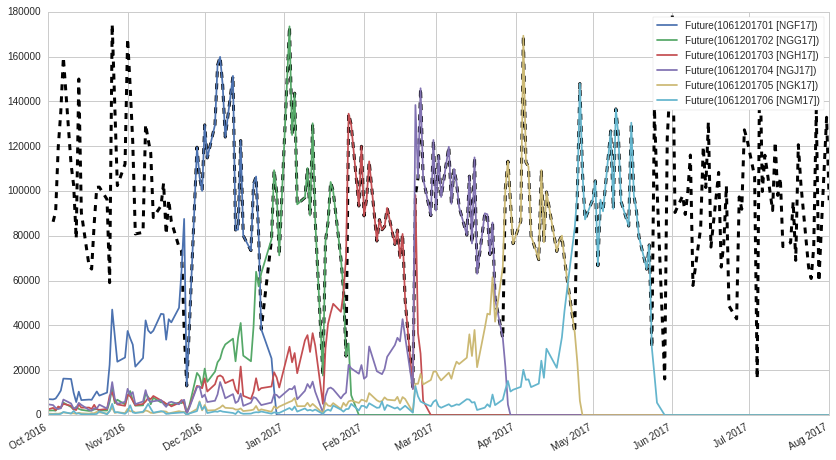

In [18]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=3)
ng_consecutive_contract_volume.plot(ax=ax, xlim = ['2016-10-01','2017-08-01']);

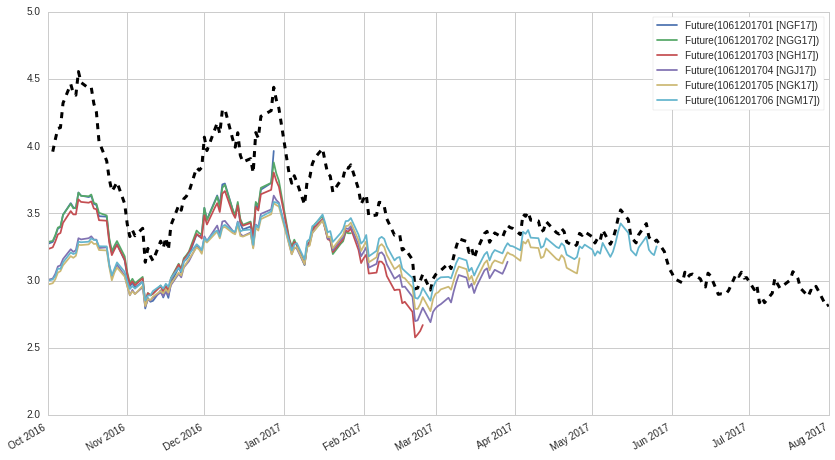

In [19]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 'NGJ17', 'NGK17', 'NGM17'])
ng_consecutive_contract_prices = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily', 
                                         start ='2016-01-01', 
                                         end ='2017-08-01')
ax = ng_cont_active['price'].plot(ls='--',c='black',lw=3)
ng_consecutive_contract_prices.plot(ax=ax, xlim = ['2016-10-01','2017-08-01']);

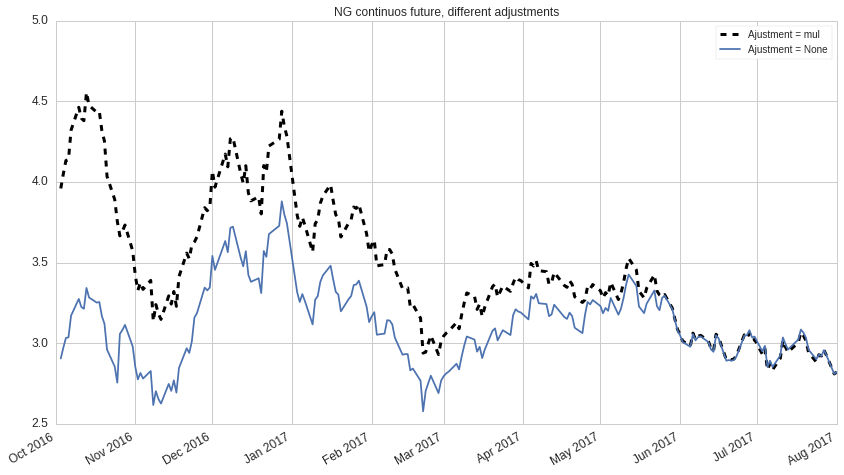

In [41]:
continuous_ng_unadjusted = continuous_future('NG', offset=0, roll='volume', adjustment=None)
ng_unadjusted_history = history(continuous_ng_unadjusted, 
                                fields=['contract', 'price', 'volume'], 
                                frequency='daily', 
                                start='2016-10-01', 
                                end='2017-08-01')
ax = ng_cont_active['price'].plot(ls='--',c='black',lw=3, label='Ajustment = mul', 
                                  title = 'NG continuos future, different adjustments', fontsize=12)
ng_unadjusted_history['price'].plot(ax =ax, xlim = ['2016-10-01','2017-08-01'], label = 'Ajustment = None')
plt.legend();

In [42]:
ng_unadjusted_history.head(10)

,price,volume,contract
2016-10-03 00:00:00+00:00,2.906,86282.0,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,2.973,90845.0,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,3.033,119522.0,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,3.037,135372.0,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,3.171,159697.0,Future(1061201611 [NGX16])
2016-10-10 00:00:00+00:00,3.275,111928.0,Future(1061201611 [NGX16])
2016-10-11 00:00:00+00:00,3.225,102597.0,Future(1061201611 [NGX16])
2016-10-12 00:00:00+00:00,3.214,78774.0,Future(1061201611 [NGX16])
2016-10-13 00:00:00+00:00,3.343,150029.0,Future(1061201611 [NGX16])
2016-10-14 00:00:00+00:00,3.284,90382.0,Future(1061201611 [NGX16])


In [43]:
ng_unadjusted_history.tail(10)

,price,volume,contract
2017-07-19 00:00:00+00:00,3.066,69074.0,Future(1061201708 [NGQ17])
2017-07-20 00:00:00+00:00,3.033,120700.0,Future(1061201708 [NGQ17])
2017-07-21 00:00:00+00:00,2.960,103158.0,Future(1061201708 [NGQ17])
2017-07-24 00:00:00+00:00,2.901,66016.0,Future(1061201708 [NGQ17])
2017-07-25 00:00:00+00:00,2.929,60968.0,Future(1061201709 [NGU17])
2017-07-26 00:00:00+00:00,2.921,75030.0,Future(1061201709 [NGU17])
2017-07-27 00:00:00+00:00,2.958,136600.0,Future(1061201709 [NGU17])
2017-07-28 00:00:00+00:00,2.923,59646.0,Future(1061201709 [NGU17])
2017-07-31 00:00:00+00:00,2.810,132934.0,Future(1061201709 [NGU17])
2017-08-01 00:00:00+00:00,2.821,95926.0,Future(1061201709 [NGU17])


In [46]:
ng_unadjusted_history.index[:5]

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07'],
              dtype='datetime64[ns, UTC]', freq='C')

In [49]:
#pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index, columns='contract', values=['price'])
pivot_unadj = ng_unadjusted_history[['price','contract']].pivot(index=ng_unadjusted_history.index, columns='contract') #, values=['price'])

In [50]:
pivot_unadj.head(10)

price  \
contract                  Future(1061201611 [NGX16])   
2016-10-03 00:00:00+00:00                      2.906   
2016-10-04 00:00:00+00:00                      2.973   
2016-10-05 00:00:00+00:00                      3.033   
2016-10-06 00:00:00+00:00                      3.037   
2016-10-07 00:00:00+00:00                      3.171   
2016-10-10 00:00:00+00:00                      3.275   
2016-10-11 00:00:00+00:00                      3.225   
2016-10-12 00:00:00+00:00                      3.214   
2016-10-13 00:00:00+00:00                      3.343   
2016-10-14 00:00:00+00:00                      3.284   

                                                      \
contract                  Future(1061201612 [NGZ16])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   
2016-10-10 00:00:00+00:00                        NaN   
2016-10-11 00:00:00+00:00                        NaN   
2016-10-12 00:00:00+00:00                        NaN   
2016-10-13 00:00:00+00:00                        NaN   
2016-10-14 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201701 [NGF17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   
2016-10-10 00:00:00+00:00                        NaN   
2016-10-11 00:00:00+00:00                        NaN   
2016-10-12 00:00:00+00:00                        NaN   
2016-10-13 00:00:00+00:00                        NaN   
2016-10-14 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201702 [NGG17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   
2016-10-10 00:00:00+00:00                        NaN   
2016-10-11 00:00:00+00:00                        NaN   
2016-10-12 00:00:00+00:00                        NaN   
2016-10-13 00:00:00+00:00                        NaN   
2016-10-14 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201703 [NGH17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   
2016-10-10 00:00:00+00:00                        NaN   
2016-10-11 00:00:00+00:00                        NaN   
2016-10-12 00:00:00+00:00                        NaN   
2016-10-13 00:00:00+00:00                        NaN   
2016-10-14 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201704 [NGJ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   
2016-10-10 00:00:00+00:00                        NaN   
2016-10-11 00:00:00+00:00                        NaN   
2016-10-12 00:00:00+00:00                        NaN   
2016-10-13 00:00:00+00:00                        NaN   
2016-10-14 00:00:00+00:00                        NaN   

         

In [51]:
pivot_unadj.tail(10)

price  \
contract                  Future(1061201611 [NGX16])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201612 [NGZ16])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201701 [NGF17])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201702 [NGG17])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201703 [NGH17])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201704 [NGJ17])   
2017-07-19 00:00:00+00:00                        NaN   
2017-07-20 00:00:00+00:00                        NaN   
2017-07-21 00:00:00+00:00                        NaN   
2017-07-24 00:00:00+00:00                        NaN   
2017-07-25 00:00:00+00:00                        NaN   
2017-07-26 00:00:00+00:00                        NaN   
2017-07-27 00:00:00+00:00                        NaN   
2017-07-28 00:00:00+00:00                        NaN   
2017-07-31 00:00:00+00:00                        NaN   
2017-08-01 00:00:00+00:00                        NaN   

         

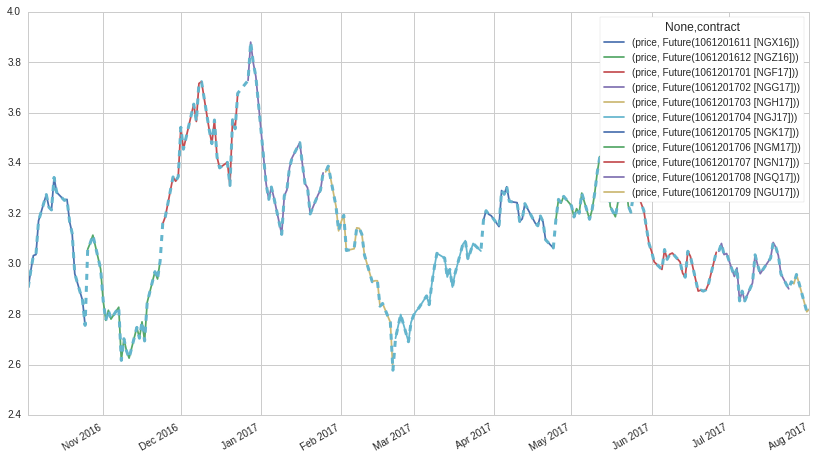

In [52]:
ax = pivot_unadj.plot()
ng_unadjusted_history['price'].plot(ax =ax, ls='--', lw=3)